# Pandas (문제 1 ~ 문제 6)



## 문제 1 (난이도: ★★)

아래 테이블과 같은 csv파일 또는 excel 파일을 PC에서 생성후 Colab 환경으로 불러드리는 절차를 수행한 후 __EmpID가 인덱스 컬럼(Column)인__ Pandas df를 생성하세요.

|EmpID|Gender|Age|Sales|BMI|
|---|---|---|---|---|
|E001|M|34|123|Normal|
|E002|F|40|114|Overweight|
|E003|F|37|135|Obesity|
|E004|M|30|139|Underweight|
|E005|F|44|117|Underweight|
|E006|M|36|121|Normal|
|E007|M|32|133|Obesity|
|E008|F|26|140|Normal|
|E009|M|32|133|Normal|
|E010|M|36|133|Underweight|


In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df
df.set_index('EmpID')


,Gender,Age,Sales,BMI
EmpID,,,,
E001,M,34,123,Normal
E002,F,40,114,Overweight
E003,F,37,135,Obesity
E004,M,30,139,Underweight
E005,F,44,117,Underweight
E006,M,36,121,Normal
E007,M,32,133,Obesity
E008,F,26,140,Normal
E009,M,32,133,Normal


## 문제 2 (난이도: ★★)

위에서 생성한 df를 이용하여 아래와 같은 나이(Age)에 대한 히스토그램(Histogram)을 출력해 보세요.

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/04/Histo.png">

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feadc2a5d10>]],
      dtype=object)

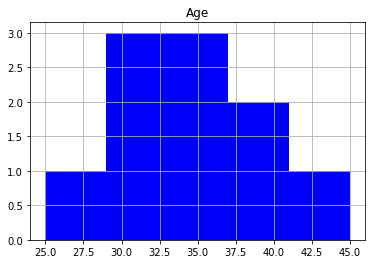

In [3]:
df.hist(column='Age',bins=5, range=[25,45], facecolor='blue')

([<matplotlib.axis.XTick at 0x7feadc2b2290>,
 <a list of 5 Text major ticklabel objects>)

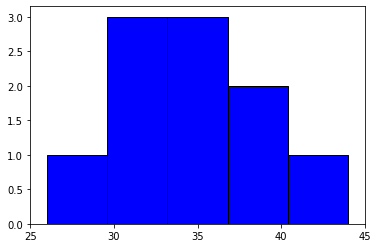

In [4]:
import matplotlib.pyplot as plt
import numpy as np
age = df['Age']
plt.hist(age, bins=5, facecolor='blue', edgecolor='black')
plt.xticks(np.arange(25,46,step=5))

## 문제 3 (난이도: ★★)

위에서 생성한 df를 이용하여 아래와 같이 성별(Gender)과 체질량지수(BMI)에 대한 빈도수를 표로 출력해 보세요

<img src= 'https://www.analyticsvidhya.com/wp-content/uploads/2015/04/Frequency.png'>


In [5]:
freq_table= df.groupby(['Gender','BMI'])
print(freq_table)
freq_table.size()

Gender  BMI        
F       Normal         1
        Obesity        1
        Overweight     1
        Underweight    1
M       Normal         3
        Obesity        1
        Underweight    2
dtype: int64

## 문제 4 (난이도: ★★)

BMI를 범주형 변수(Categorical Variable) - [Underweight(저체중)=0, Normal(정상체중)=1, Overweight(과체중) =2, Obesity(비만)=3]- 로 변환하고 그 값을 새로운 컬럼(Column), BMI_index,로 하여 df에 추가하고 확인하세요.

|EmpID|	Gender|	Age|	Sales|	BMI|	BMI_index|
|---|---|---|---|---|---|
|E001|	M|	34|	123|	Normal|	1|
|E002|	F|	40|	114|	Overweight|	2|
|E003|	F|	37|	135|	Obesity|	3|
|E004|	M|	30|	139|	Underweight|	0|
|E005|	F|	44|	117|	Underweight|	0|
|E006|	M|	36|	121|	Normal|	1|
|E007|	M|	32|	133|	Obesity|	3|
|E008|	F|	26|	140|	Normal|	1|
|E009|	M|	32|	133|	Normal|	1|
|E010|	M|	36|	133|	Underweight|	0|

In [6]:
bmi = pd.Categorical(df['BMI'], ordered=True, categories=['Underweight', 'Normal', 'Overweight','Obesity'])
print(bmi.codes)
df['BMI_index']=bmi.codes
df

[1 2 3 0 0 1 3 1 1 0]


,EmpID,Gender,Age,Sales,BMI,BMI_index
0,E001,M,34,123,Normal,1
1,E002,F,40,114,Overweight,2
2,E003,F,37,135,Obesity,3
3,E004,M,30,139,Underweight,0
4,E005,F,44,117,Underweight,0
5,E006,M,36,121,Normal,1
6,E007,M,32,133,Obesity,3
7,E008,F,26,140,Normal,1
8,E009,M,32,133,Normal,1
9,E010,M,36,133,Underweight,0


## 문제 5 (난이도: ★★)

남녀 그룹별로 Age, Sales,BMI_index에 대한 평균, 표준편차, 최대치, 최소치 등을 계산하세요.

In [7]:
df.groupby(['Gender']).describe().T

Gender                    F           M
Age       count    4.000000    6.000000
          mean    36.750000   33.333333
          std      7.719024    2.422120
          min     26.000000   30.000000
          25%     34.250000   32.000000
          50%     38.500000   33.000000
          75%     41.000000   35.500000
          max     44.000000   36.000000
Sales     count    4.000000    6.000000
          mean   126.500000  130.333333
          std     12.922848    6.889606
          min    114.000000  121.000000
          25%    116.250000  125.500000
          50%    126.000000  133.000000
          75%    136.250000  133.000000
          max    140.000000  139.000000
BMI_index count    4.000000    6.000000
          mean     1.500000    1.000000
          std      1.290994    1.095445
          min      0.000000    0.000000
          25%      0.750000    0.250000
          50%      1.500000    1.000000
          75%      2.250000    1.000000
          max      3.000000    3.000000

In [8]:
gender = 'MF'
for g in gender:
  print(df[df.Gender==g].describe())

             Age       Sales  BMI_index
count   6.000000    6.000000   6.000000
mean   33.333333  130.333333   1.000000
std     2.422120    6.889606   1.095445
min    30.000000  121.000000   0.000000
25%    32.000000  125.500000   0.250000
50%    33.000000  133.000000   1.000000
75%    35.500000  133.000000   1.000000
max    36.000000  139.000000   3.000000
             Age       Sales  BMI_index
count   4.000000    4.000000   4.000000
mean   36.750000  126.500000   1.500000
std     7.719024   12.922848   1.290994
min    26.000000  114.000000   0.000000
25%    34.250000  116.250000   0.750000
50%    38.500000  126.000000   1.500000
75%    41.000000  136.250000   2.250000
max    44.000000  140.000000   3.000000


## 문제 6 (난이도: ★★)

조사표본 전체 및 남녀 그룹별로 Age와 Sales 사이에 상관관계(Correlation)가 있는지 조사하세요.



In [9]:
df2 = df[['Gender','Age','Sales']]
df2.corr()

,Age,Sales
Age,1.000000,-0.801643
Sales,-0.801643,1.000000


In [10]:
print(df2.groupby(['Gender']).corr())

                   Age     Sales
Gender                          
F      Age    1.000000 -0.843761
       Sales -0.843761  1.000000
M      Age    1.000000 -0.703123
       Sales -0.703123  1.000000


## 문제 7 (난이도: ★★★)

문제 6서 사용된 데이터프레임에서 (1) __무작위로 서로 다른 5개의 샘플__을 추출하고 (2) Gender를 여자는 0, 남자는 1로 범주형 데이터로 변환한 후 (3) 데이터프레임을 numpy array로 변환하는 코드를 작성하세요

In [11]:
# get 5 random rows from the dataframe df2

df3 = df2.sample(n=5, replace=False)
print(df3)

df_gender = df3['Gender'].astype('category').values.codes
print(df_gender)
df3.Gender = df_gender
print(df3)
np_data = df3.values
print(np_data)

  Gender  Age  Sales
4      F   44    117
1      F   40    114
0      M   34    123
5      M   36    121
6      M   32    133
[0 0 1 1 1]
   Gender  Age  Sales
4       0   44    117
1       0   40    114
0       1   34    123
5       1   36    121
6       1   32    133
[[  0  44 117]
 [  0  40 114]
 [  1  34 123]
 [  1  36 121]
 [  1  32 133]]


In [12]:
# get 5 random rows from the dataframe df2

idx = np.random.choice(len(df2),5, replace=False)
print(idx)

df3 = df2.iloc[idx]
df_gender = df3['Gender'].astype('category').values.codes
df3.Gender = df_gender
print(df3)
np_data = df3.values
print(np_data)

[4 0 8 9 2]
   Gender  Age  Sales
4       0   44    117
0       1   34    123
8       1   32    133
9       1   36    133
2       0   37    135
[[  0  44 117]
 [  1  34 123]
 [  1  32 133]
 [  1  36 133]
 [  0  37 135]]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Numpy  (문제 8 ~ 문제 9)



In [13]:
import numpy as np

A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
B = np.matrix([[1, 0, 1],
               [1, 1, 1],
               [0, 0, 1]])


## 문제 8 (난이도: ★★)

다음 연산을 수행하세요
  - $A\cdot B$
  - $A^3$
  - $A^2 - 2A +3$
  - 역행렬(Inverse Matrix) $A^{-1}$
  - 행렬식(Matrix Determinant) $|A|$
  - 대각합(Trace): tr(A)


In [14]:
A.dot(B)

matrix([[11,  6, 13],
        [11,  7, 30],
        [ 3,  3, 15]])

In [15]:
A ** 3

matrix([[ 557, 1284, 3356],
        [ 760, 2305, 6994],
        [ 288, 1074, 3519]])

In [16]:
A.dot(A).dot(A)

matrix([[ 557, 1284, 3356],
        [ 760, 2305, 6994],
        [ 288, 1074, 3519]])

In [17]:
A.dot(A)-2*A+3

matrix([[ 42,  69, 147],
        [ 43, 119, 334],
        [ 15,  54, 180]])

In [18]:
np.linalg.inv(A)

matrix([[-0.20930233,  0.51162791, -0.7751938 ],
        [ 0.37209302, -0.46511628,  0.6744186 ],
        [-0.09302326,  0.11627907, -0.08527132]])

In [19]:
np.linalg.det(A)

-129.00000000000009

In [20]:
np.trace(A)

24

## 문제 9 (난이도: ★★)

선형 연립방정식은 알래와 같이 행렬을 이용하여 표현할 수 있다.

$$Ax=b$$


$$
A = \begin{pmatrix}
8 & 3 & -2\\
-4 & 7 & 5\\
3 & 4 & -12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
9\\
15\\
35 
\end{pmatrix}
$$

(1) numpy를 이용하여 해를 구하세요.
(2) 해가 맞는지 확인하는 코드를 작성하세요 

In [21]:
A = np.array([[8, 3, -2],
               [-4, 7, 5],
               [3, 4, -12]])
b=np.matrix([9,15,35]).transpose()

A.shape, b.shape

((3, 3), (3, 1))

In [22]:
inv_A = np.linalg.inv(A) 
x = inv_A.dot(b)
x

matrix([[-0.58226371],
        [ 3.22870478],
        [-1.98599767]])

In [23]:
print(A.dot(x))
print('\n\n')
print(b)

[[ 9.]
 [15.]
 [35.]]



[[ 9]
 [15]
 [35]]


In [24]:
np.array_equal(A.dot(x), b)

False

In [25]:
A.dot(x) == b

matrix([[ True],
        [False],
        [False]])

In [26]:
np.allclose(A.dot(x), b, atol=1e-10)

True

In [27]:
np.set_printoptions(precision=2, suppress=True)

A.dot(inv_A)

array([[ 1., -0.,  0.],
       [-0.,  1.,  0.],
       [ 0., -0.,  1.]])

# 종합 응용 문제

## 문제 10 (난이도  ★★★)

[Sigmoid or Logistic Activation Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)

The Sigmoid Function curve looks like a S-shape.

$$ f(x) = \frac{1}{1+e^{-x}} = \frac {e^x}{e^x+1} = \frac {1}{2} + \frac {1}{2}tanh( \frac {x}{2}) $$


<img src = "https://miro.medium.com/max/728/1*Xu7B5y9gp0iL5ooBj7LtWw.png">

- Domain(정의역): [$-\infty,\infty$]
- Range(치역): [0, 1]



### 문제 10.1

입력 x= np.array([1,-3,3, 0, -0.5])가 주어질때 sigmoid 함수값을 계산하는 루틴을 작성하세요.

In [28]:
# calculate the sigmoid of a vector

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return  s

print(sigmoid(np.array([1,-3,3,0,-0.5])))

[0.73 0.05 0.95 0.5  0.38]


### 문제 10.2

x =  np.arange(-10,10,0.1)이 주어졌을때 시그모이드 함수 그래프를 그려보세요.


Text(0.5, 1.0, 'Sigmoid Activation Function')

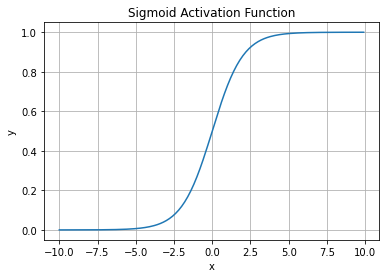

In [29]:
x = np.arange(-10,10,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sigmoid Activation Function")

## 문제 11

### [MNIST Data](http://yann.lecun.com/exdb/mnist/)

- 1998년에 만들어진 필기체 손글씨 숫자(0~9) 데이터셋  
- 60,000개의 트레이닝 이미지와 10,000개의 테스트 이미지로 구성
- 각 숫자이미지는 28x28 크기의 흑백(grayscale) 이미지


> The MNIST Handwritten Digits dataset is considered as the “Hello World” of Computer Vision. 



<img src="https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png">


아래 코드셀은 mnist 데이터셋을 다운로드하여 훈련데이터와 테스트데이터로 구분된 numpy array를 만들어드는 코드블록이다.

아래 코드셀을 실행한 후 문제를 풀어야 됩니다.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Download and load the data

(x_train, y_train),(x_test,y_test)=mnist.load_data()

print('x_train: ' + str(x_train.shape)) # 훈련 데이터
print('y_train: ' + str(y_train.shape)) # 훈련 데이터 정답
print('x_test:  '  + str(x_test.shape)) # 테스트 데이터
print('y_test:  '  + str(y_test.shape)) # 테스트 데이터 정답
print(y_train[0:5])

11493376/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)
[5 0 4 1 9]


In [31]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 문제 11.1 ((난이도  ★★)

임의의 훈련용 데이터(x_train[i])가 어떤 방식으로 저장되어 있는지, 무슨 숫자인지 파악할 수 있는 방법을 생각해 보세요.

즉 어떻게 하면 가장 단순하게 특정 이미지 x_train[i]가 무슨 숫자인 확인할 수 있을까요?





In [32]:
# Browse raw image data.

np.set_printoptions(linewidth=300, precision=2)
index = np.random.randint(0, x_train.shape[0])

print("True label: ", y_train[index])
print(x_train[index])

True label:  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 141 255 228  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  63 197 252 253 252  56   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10 197 252 177 128 252 171  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 179 252 177   3

### 문제 11.2 (난이도  ★★★)

y_train은 60000개의 숫자이미지의 정답으로 이루어진 백터이다.  이 백터안에 각 숫자가 몇개씩 들어가 있는지를 확인하여 각 숫자의 빈도수 분포를 막대그래프(bar chart)로 출력하는 코드를 만들어 보세요.

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


<BarContainer object of 10 artists>

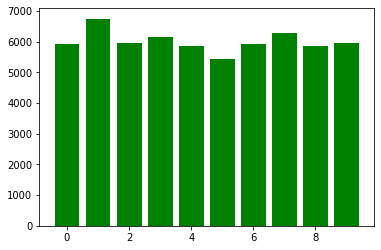

In [33]:
# count and plot the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
y_train_dist = dict(zip(unique, counts))
print("Train labels: ", y_train_dist)
plt.bar(y_train_dist.keys(), y_train_dist.values(), color='g')

### 문제 11.3 (난이도  ★★★★)

훈련용 데이터에서 아래와 같이 임의로 25개의 이미지를 출력하는 코드를 작성해 보세요.

<img src='https://miro.medium.com/max/1050/1*LyRlX__08q40UJohhJG9Ow.png'>

[57068  5179  6270 29183 27745 56088 52197  4368 44061 47171 24023 55363 43676  7501 18658 37846 23652  8952 25386 11685  1646  2328   745 15379 26606]




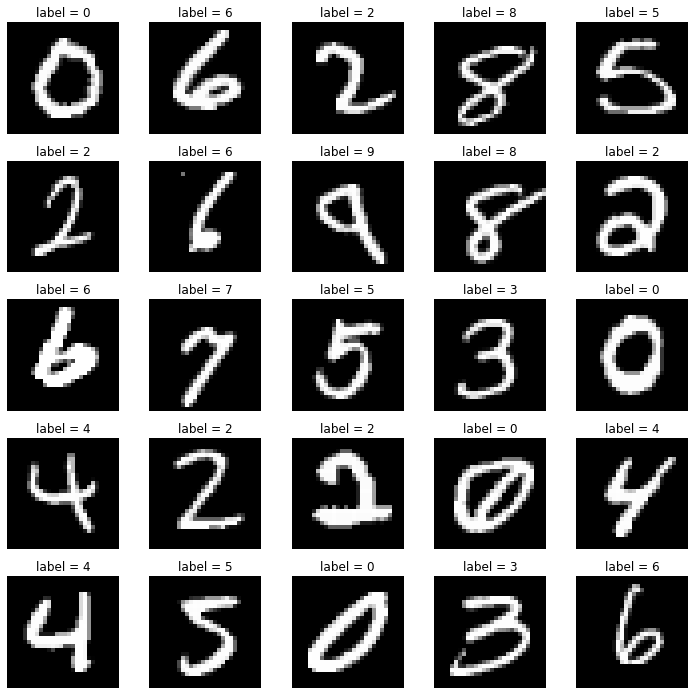

In [34]:
# Randomly sample 25 mnist digits from train dataset


idx =  np.random.choice(len(x_train), 25, replace=False)
print(idx)
print('\n')

# plot the 25 mnist digits

plt.figure(figsize=(10,10))
for i in np.arange(0,25):
    plt.subplot(5, 5, i + 1)
    image = x_train[idx[i]]
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(y_train[idx[i]]))
    plt.tight_layout()
    plt.axis('off')

### 문제 11.4 (난이도  ★★★★★)

테스트 데이터에서 정답이 i(i=0,1,2,,,,9)인 25개의 이미지를 무작위로 출력하는 함수를 만들고 작동하는지 함수를 실행하여 보세요.

예를 들면, 테스트셋에 포함된 10,000개의 이미지중에서 특정 숫자(예를 들면 5)인 이미지를  무작위로 25개 뽑아내어 출력하는 코드를 작성하라는 문제입니다.

(1028, 28, 28)


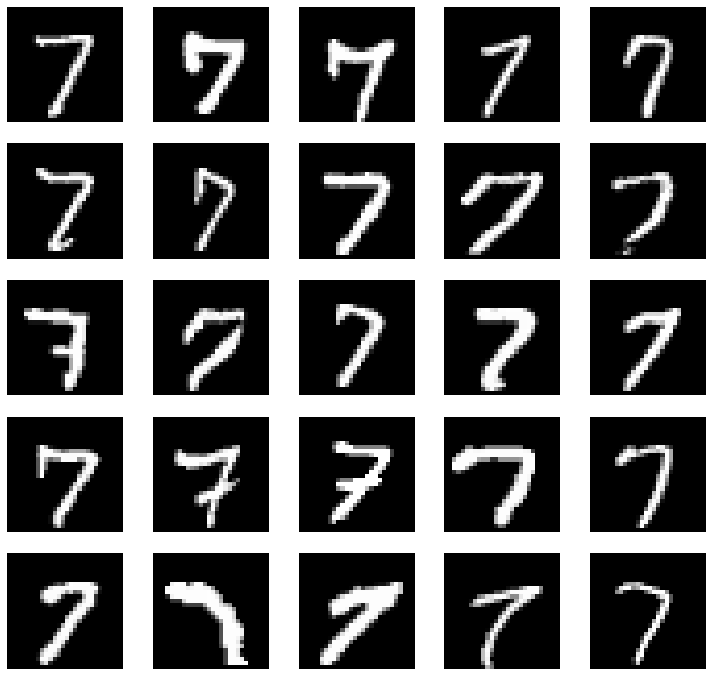

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Randomly sample 25 mnist images of a specific number from 0 to 9  from test dataset


def show_digit(i):

  test_filter = np.where((y_test == i))
  test_images = x_test[test_filter]
  print(test_images.shape)

  idx =  np.random.choice(len(test_images), 25, replace=False)

  # plot the 25 mnist digits

  plt.figure(figsize=(10,10))
  for i in np.arange(0,25):
    plt.subplot(5, 5, i + 1)
    image = test_images[idx[i]]
    plt.imshow(image, cmap='gray')   
    plt.tight_layout()
    plt.axis('off')

show_digit(7)